In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scanpy as sc
from pathlib import Path 

In [2]:
plt.rcParams['figure.figsize'] = (4, 3) 

In [3]:
path_tonsilitis = "/lustre/groups/ml01/workspace/alessandro.palma/scportrait/data/cellfeaturization_results_tonsilitis.h5ad"
adata_tonsilitis = sc.read_h5ad(path_tonsilitis)

## Tonsilitis

In [4]:
adata_tonsilitis

AnnData object with n_obs × n_vars = 19784 × 355
    obs: 'scportrait_cell_id', 'region', 'shared_leiden_cluster_id'
    uns: 'spatialdata_attrs'

In [5]:
adata_tonsilitis.uns

{'spatialdata_attrs': {'instance_key': 'scportrait_cell_id',
  'region': array(['seg_all_nucleus'], dtype=object),
  'region_key': 'region'}}

In [6]:
sc.tl.pca(adata_tonsilitis)

The data is very low dimensional 

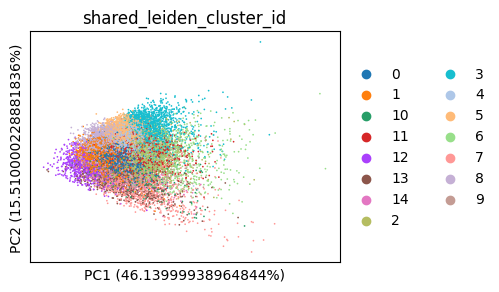

In [7]:
sc.pl.pca(adata_tonsilitis, 
          color="shared_leiden_cluster_id", 
          annotate_var_explained=True)

In [8]:
mean_feature = adata_tonsilitis.X.mean(0)
std_features = adata_tonsilitis.X.std(0)

In [9]:
mean_feature.max()

np.float32(500.21518)

In [10]:
mean_feature.min()

np.float32(0.0)

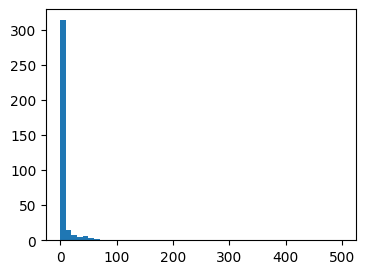

In [11]:
plt.hist(mean_feature, 50)
plt.show()

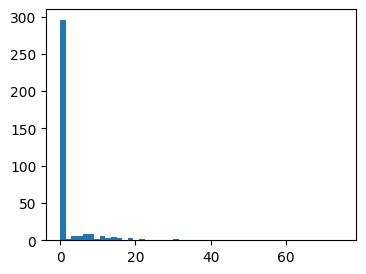

In [12]:
plt.hist(std_features, 50)
plt.show()

Many features are zeros and have zero variance

**Check all zero features**

In [14]:
(adata_tonsilitis.X==0).all(0).sum()

np.int64(22)

26 out of 355 features are zeros for all observations 

**Compute UMAP for visualization**

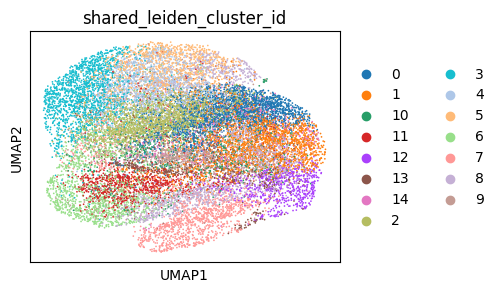

In [15]:
sc.pp.neighbors(adata_tonsilitis)
sc.tl.umap(adata_tonsilitis)
sc.pl.umap(adata_tonsilitis, 
          color="shared_leiden_cluster_id")